In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
from itertools import chain, combinations
from mlp import Layer, LeakyRelu, Linear, MultilayerPerceptron, Relu, Sigmoid, Softmax, SquaredError
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

In [2]:
def get_mpg_dataset():
    # fetch dataset
    auto_mpg = fetch_ucirepo(id=9)

    # data (as pandas dataframes)
    X = auto_mpg.data.features
    y = auto_mpg.data.targets

    # Combine features and target into one DataFrame for easy filtering
    data = pd.concat([X, y], axis=1)

    # Drop rows where the target variable is NaN
    cleaned_data = data.dropna()

    # Split the data back into features (X) and target (y)
    X = cleaned_data.iloc[:, :-1]
    y = cleaned_data.iloc[:, -1]

    # Display the number of rows removed
    rows_removed = len(data) - len(cleaned_data)
    print(f"Rows removed: {rows_removed}")   
    # Do a 70/30 split (e.g., 70% train, 30% other)
    X_train, X_leftover, y_train, y_leftover = train_test_split(
        X, y,
        test_size=0.3,
        random_state=42,    # for reproducibility
        shuffle=True,       # whether to shuffle the data before splitting
    )

    # Split the remaining 30% into validation/testing (15%/15%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_leftover, y_leftover,
        test_size=0.5,
        random_state=42,
        shuffle=True,
    )

    # Compute statistics for X (features)
    X_mean = X_train.mean(axis=0)  # Mean of each feature
    X_std = X_train.std(axis=0)    # Standard deviation of each feature

    # Standardize X
    X_train = (X_train - X_mean) / X_std
    X_val = (X_val - X_mean) / X_std
    X_test = (X_test - X_mean) / X_std

    # Compute statistics for y (targets)
    y_mean = y_train.mean()  # Mean of target
    y_std = y_train.std()    # Standard deviation of target

    # Standardize y
    y_train = (y_train - y_mean) / y_std
    y_val = (y_val - y_mean) / y_std
    y_test = (y_test - y_mean) / y_std
    return X_train,y_train, X_val, y_val, X_test, y_test



In [65]:
X_train,y_train, X_val, y_val, X_test, y_test = get_mpg_dataset()
activation = Linear()
model = MultilayerPerceptron(
    layers=[
        Layer(fan_in=7, fan_out=1, activation_function=activation),
    ]
)

Rows removed: 6
weights shape (7, 1)
bias shape (1,)


In [66]:
loss = SquaredError()
training_losses, validation_losses = model.train( 
    train_x=X_train.to_numpy(),
    train_y=y_train.to_numpy().reshape(-1, 1),
    val_x=X_val.to_numpy(),
    val_y=y_val.to_numpy().reshape(-1,1),
    loss_func=loss,
    learning_rate=1E-3,
    epochs=32
)



Epoch :: 1 :: Train Loss= 0.38153509645230227 :: Val Loss 0.26948710532728576
Epoch :: 2 :: Train Loss= 0.1941119143240661 :: Val Loss 0.1504840297983546
Epoch :: 3 :: Train Loss= 0.11697126978838529 :: Val Loss 0.10101872833528217
Epoch :: 4 :: Train Loss= 0.08266840556855833 :: Val Loss 0.07937770736503459
Epoch :: 5 :: Train Loss= 0.07032582675863262 :: Val Loss 0.0734545762174917
Epoch :: 6 :: Train Loss= 0.06398976737570376 :: Val Loss 0.06379466595841236
Epoch :: 7 :: Train Loss= 0.062274439324479264 :: Val Loss 0.0630220839536067
Epoch :: 8 :: Train Loss= 0.05886473013746021 :: Val Loss 0.06145593352921219
Epoch :: 9 :: Train Loss= 0.06091230052319589 :: Val Loss 0.05941220766597214
Epoch :: 10 :: Train Loss= 0.05667945855818937 :: Val Loss 0.05837225452884796
Epoch :: 11 :: Train Loss= 0.056424832644719994 :: Val Loss 0.05943642026938373
Epoch :: 12 :: Train Loss= 0.05782637539181819 :: Val Loss 0.057644746975778226
Epoch :: 13 :: Train Loss= 0.05553401194859011 :: Val Loss 0.0

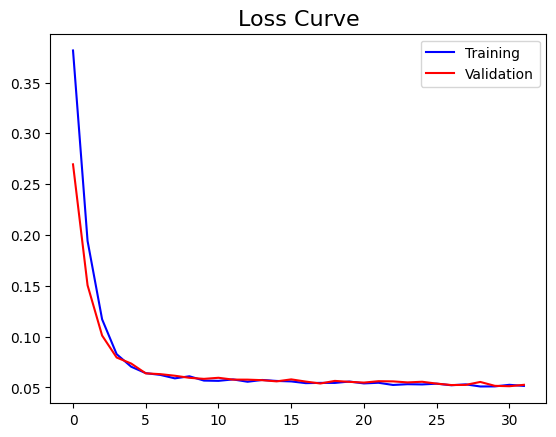

In [67]:
import matplotlib.pyplot as plt

plt.plot(training_losses, color='b', label='Training')
plt.plot(validation_losses, color='r', label="Validation")
plt.title("Loss Curve", size=16)
plt.legend()

In [68]:
print("Total testing loss", np.sum(training_losses))

Total testing loss 2.3375841350833184


In [69]:
for img, lbl in zip(X_test.values[:10], y_test[:10]):
    m =model.forward(img)[0]
    print("Predicted:", m, "true:", lbl)


Predicted: -0.27546595261698986 true: -0.4537806529217186
Predicted: -0.8423231208267609 true: -0.9527709163933785
Predicted: 0.5876918080343048 true: 0.4194523081536862
Predicted: -1.9147001652313256 true: -1.3270136139971234
Predicted: -0.21770731034508375 true: -0.32903308705380363
Predicted: -0.4795527600057331 true: -0.5286291924424678
Predicted: -1.9164806683468414 true: -1.0775184822612935
Predicted: -1.5185638855424592 true: -1.0775184822612935
Predicted: 0.26087158939290533 true: -0.16686125142551406
Predicted: 0.5462694147796829 true: -0.7032757846575485
